## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.imports import *

/ext3/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2025-09-29 10:22:57.188736: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-29 10:22:58.115095: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-29 10:22:58.610967: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-29 10:22:58.611789: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instruc

In [3]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run
from sim.wandb_scrape import *

#### Check job specs

In [4]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 5.6%
RAM Usage: 6.8%
Available RAM: 1.4T
Total RAM: 1.5T
52.4G


## Wandb API Query <a id="sims"></a>

Search and plot Random

In [5]:
from collections import defaultdict

# Define model groups and their valid feature types
models = ['xgboost', 'bilinear_lowrank', 'dynamic_mlp',
          'shared_transformer', 'shared_transformer_cls',
          'shared_transformer_pool', 'shared_transformer_cls_pool',
          'shared_transformer_pca', 'shared_transformer_pls', 
          'shared_transformer_conv', 'shared_transformer_ae', 
          'shared_transformer_celltype', 'shared_transformer_geneformer']

# Dictionary mapping models to their required feature types
model_feature_types = {
    'xgboost': ['transcriptome'],
    'bilinear_lowrank': ['transcriptome'],
    'dynamic_mlp': ['transcriptome', 'transcriptome+euclidean'],
    'shared_transformer': ['transcriptome'],
    'shared_transformer_cls': ['transcriptome'],
    'shared_transformer_pool': ['transcriptome'],
    'shared_transformer_cls_pool': ['transcriptome'],
    'shared_transformer_pca': ['transcriptome'],
    'shared_transformer_pls': ['transcriptome'],
    'shared_transformer_conv': ['transcriptome'],
    'shared_transformer_ae': ['transcriptome'],
    'shared_transformer_celltype': ['transcriptome'],
    'shared_transformer_geneformer': ['transcriptome']
}

cv_type = 'random'
null_model = 'none'
within_last = 120
before_last = 0

# Store summary DataFrames
summary_dict_random = {}
process_model_feature_combinations(cv_type, null_model, models, model_feature_types, summary_dict_random, within_last=within_last, before_last=before_last)

# cv_type = 'random'
# null_model = 'spin'

# # Store summary DataFrames
# summary_dict_random_spin = {}
# process_model_feature_combinations(cv_type, null_model, models, model_feature_types, summary_dict_random_spin, within_last=within_last, before_last=before_last)

Checking which model/feature type combinations return 40 runs for null_model=none:

🔍 Fetching runs for: model=xgboost, cv_type=random, null_model=none, feature_type=transcriptome
✓ xgboost with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=bilinear_lowrank, cv_type=random, null_model=none, feature_type=transcriptome
✓ bilinear_lowrank with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=dynamic_mlp, cv_type=random, null_model=none, feature_type=transcriptome
✓ dynamic_mlp: Successfully found 40 runs
🔍 Fetching runs for: model=dynamic_mlp, cv_type=random, null_model=none, feature_type=transcriptome+euclidean
✓ dynamic_mlp_coords: Successfully found 40 runs
🔍 Fetching runs for: model=shared_transformer, cv_type=random, null_model=none, feature_type=transcriptome
✓ shared_transformer with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=shared_transformer_cls, cv_type=random, null_model=none, feature_type=transcriptome
✓ sha

In [6]:
summary_dict_random

{'xgboost':         train_geodesic_distance  train_inter_hemi_r  \
 mean                  24.973210            0.883546   
 std                    2.294384            0.036459   
 stderr                 0.362774            0.005765   
 
         train_inter_network_Cerebellum_r  train_inter_network_Cont_r  \
 mean                            0.888657                    0.902066   
 std                             0.034657                    0.030191   
 stderr                          0.005480                    0.004774   
 
         train_inter_network_Default_r  train_inter_network_DorsAttn_r  \
 mean                         0.885756                        0.921692   
 std                          0.036843                        0.024211   
 stderr                       0.005825                        0.003828   
 
         train_inter_network_Limbic_r  train_inter_network_SalVentAttn_r  \
 mean                        0.910122                           0.906491   
 std               

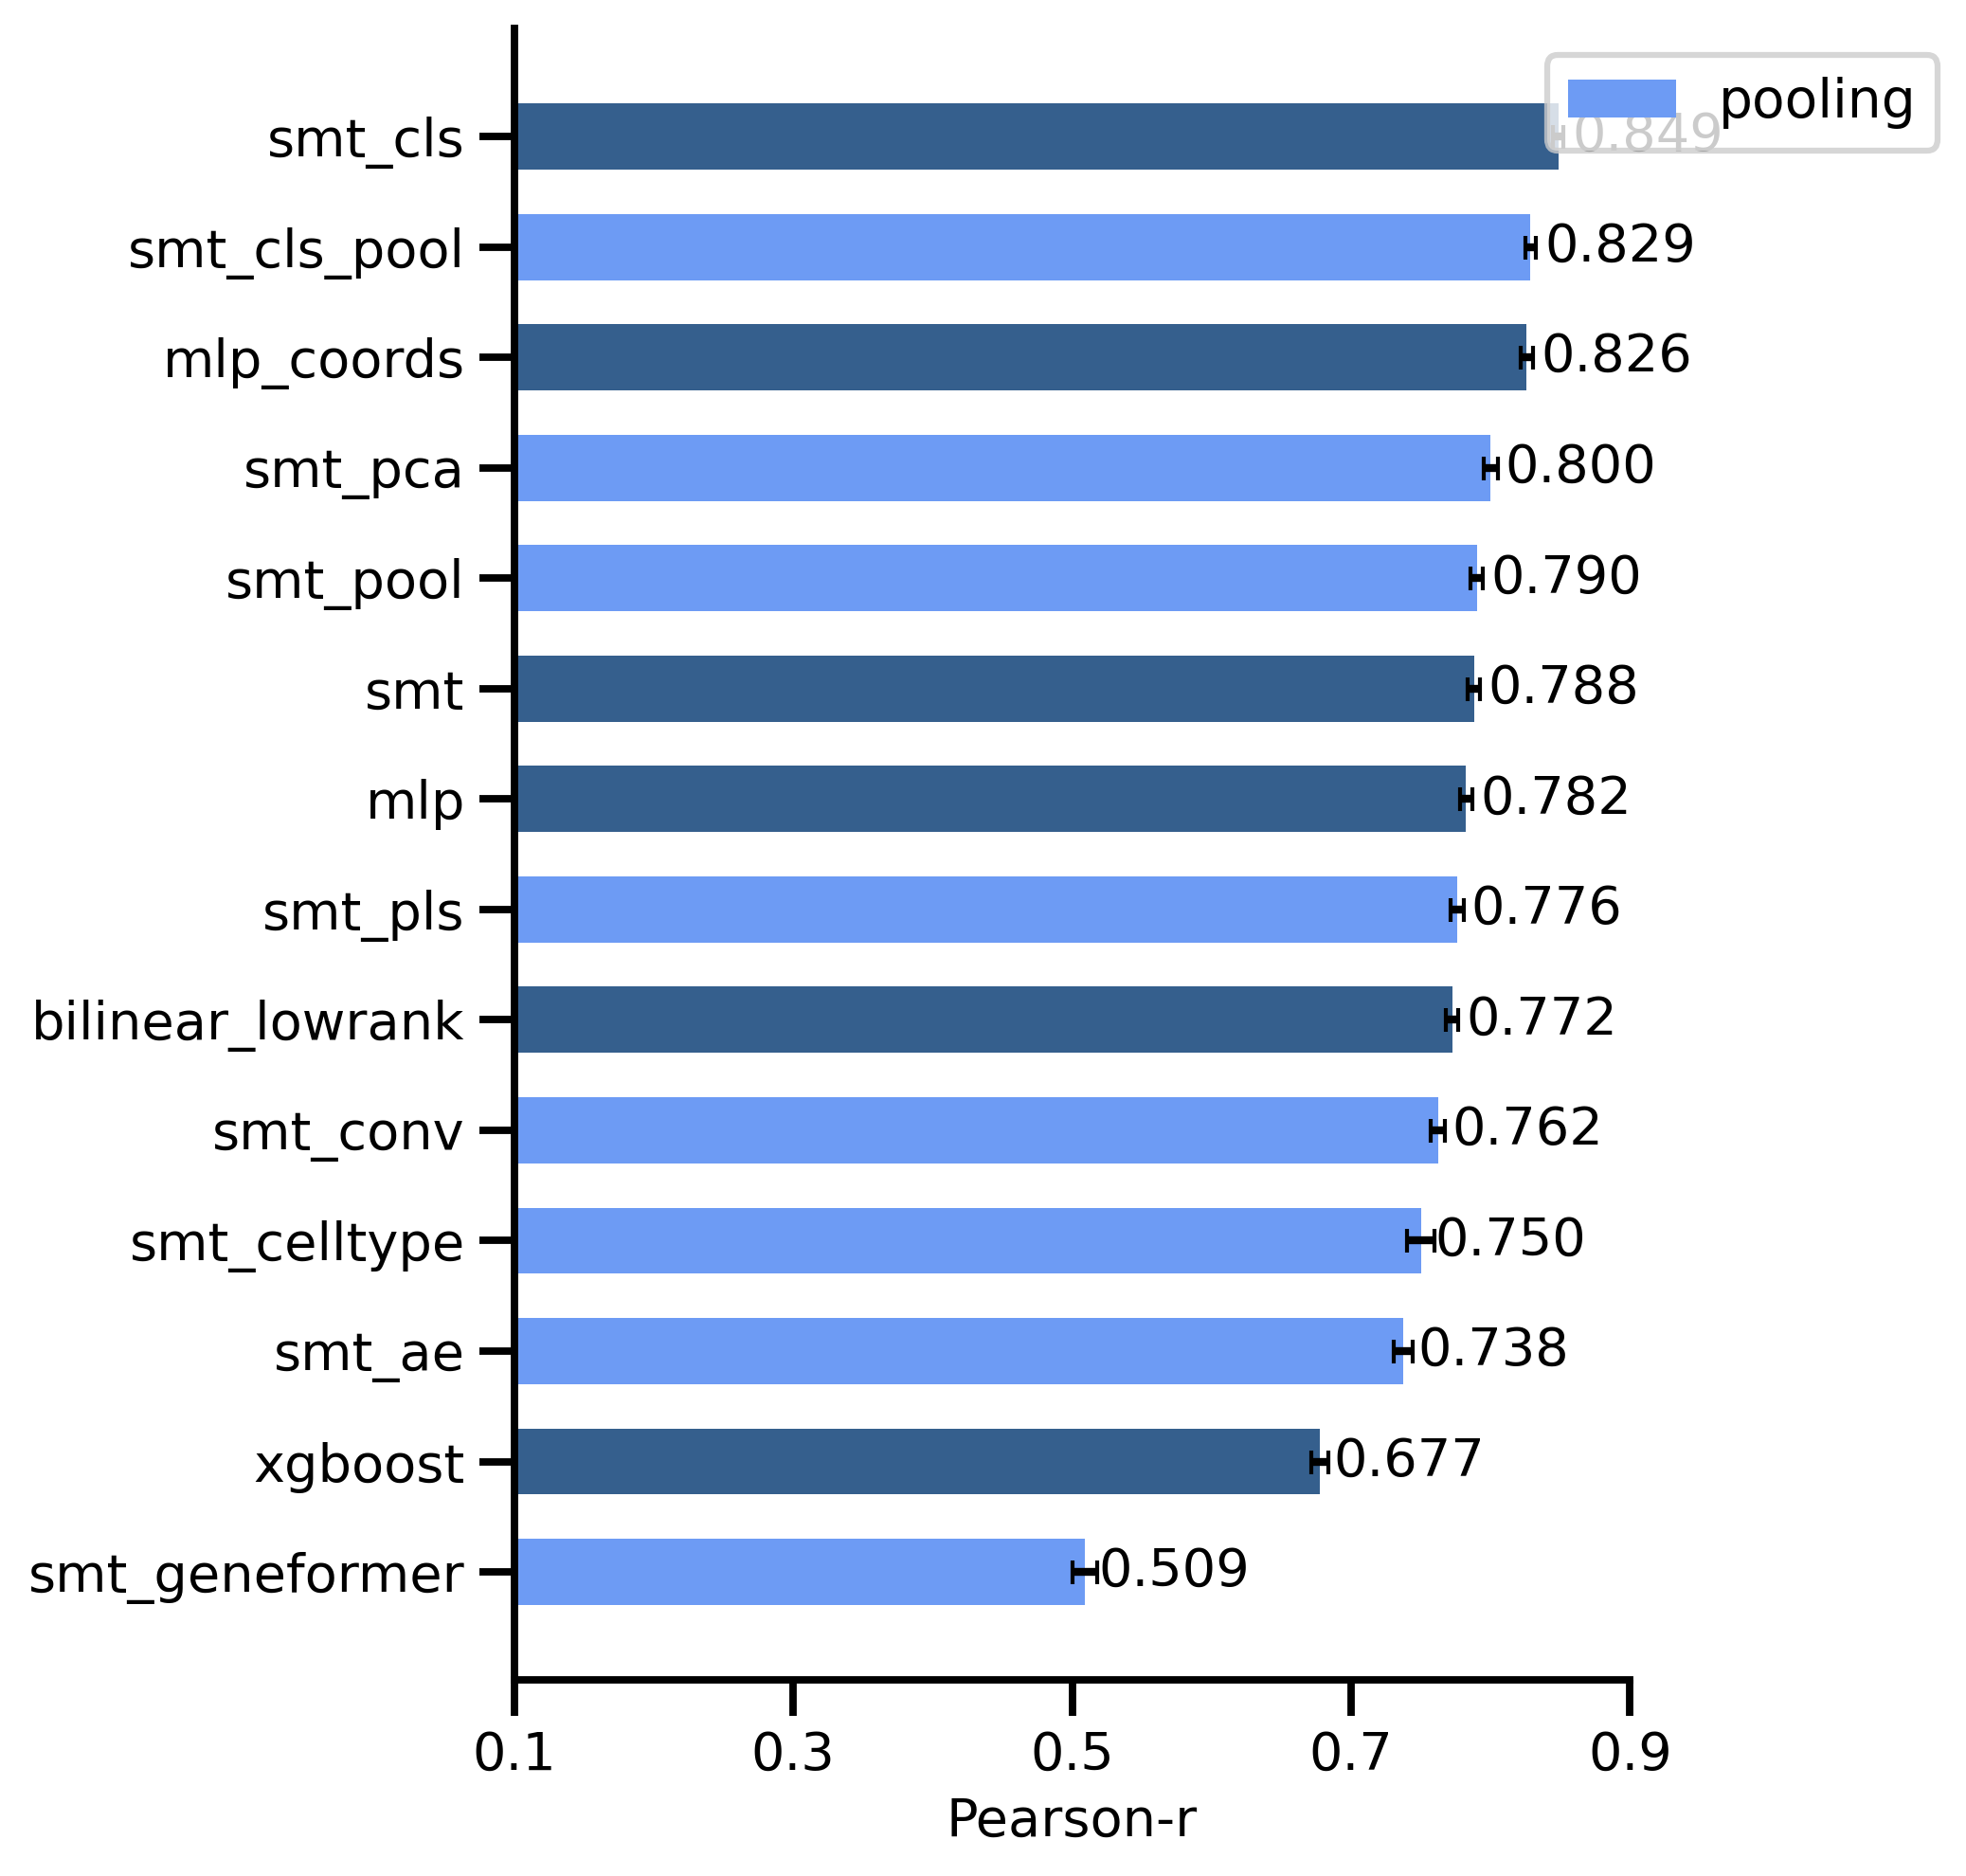

In [7]:
highlight_models = ['shared_transformer_pool', 'shared_transformer_cls_pool',
          'shared_transformer_pca', 'shared_transformer_pls',  'shared_transformer_ae', 'shared_transformer_conv', 
          'shared_transformer_celltype', 'shared_transformer_geneformer']

plot_model_barchart(summary_dict_random, metric="test_pearson_r", xlim=(0.1, 0.9), highlight_models=highlight_models, highlight_label='pooling')

Search and plot spatial

In [8]:
from collections import defaultdict

# Define model groups and their valid feature types
models = ['xgboost', 'dynamic_mlp', 'bilinear_lowrank',
          'shared_transformer', 'shared_transformer_cls', 
          'shared_transformer_pool', 'shared_transformer_cls_pool',
          'shared_transformer_pca', 'shared_transformer_pls', 
          'shared_transformer_conv', 'shared_transformer_ae', 
          'shared_transformer_celltype', 'shared_transformer_geneformer']

# Dictionary mapping models to their required feature types
model_feature_types = {
    'xgboost': ['transcriptome'],
    'bilinear_lowrank': ['transcriptome'],
    'dynamic_mlp': ['transcriptome', 'transcriptome+euclidean'],
    'shared_transformer': ['transcriptome'],
    'shared_transformer_cls': ['transcriptome'],
    'shared_transformer_pool': ['transcriptome'],
    'shared_transformer_cls_pool': ['transcriptome'],
    'shared_transformer_pca': ['transcriptome'],
    'shared_transformer_pls': ['transcriptome'],
    'shared_transformer_conv': ['transcriptome'],
    'shared_transformer_ae': ['transcriptome'],
    'shared_transformer_celltype': ['transcriptome'],
    'shared_transformer_geneformer': ['transcriptome']
}
cv_type = 'spatial'
null_model = 'none'
within_last = 120
before_last = 0

# Store summary DataFrames
summary_dict_spatial = {}
process_model_feature_combinations(cv_type, null_model, models, model_feature_types, summary_dict_spatial, within_last=within_last, before_last=before_last)

# cv_type = 'random'
# null_model = 'spin'

# # Store summary DataFrames
# summary_dict_random_spin = {}
# process_model_feature_combinations(cv_type, null_model, models, model_feature_types, summary_dict_random_spin, within_last=within_last, before_last=before_last)

Checking which model/feature type combinations return 40 runs for null_model=none:

🔍 Fetching runs for: model=xgboost, cv_type=spatial, null_model=none, feature_type=transcriptome
✓ xgboost with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=dynamic_mlp, cv_type=spatial, null_model=none, feature_type=transcriptome
✓ dynamic_mlp: Successfully found 40 runs
🔍 Fetching runs for: model=dynamic_mlp, cv_type=spatial, null_model=none, feature_type=transcriptome+euclidean
✓ dynamic_mlp_coords: Successfully found 40 runs
🔍 Fetching runs for: model=bilinear_lowrank, cv_type=spatial, null_model=none, feature_type=transcriptome
✓ bilinear_lowrank with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=shared_transformer, cv_type=spatial, null_model=none, feature_type=transcriptome
✓ shared_transformer with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=shared_transformer_cls, cv_type=spatial, null_model=none, feature_type=transcriptome

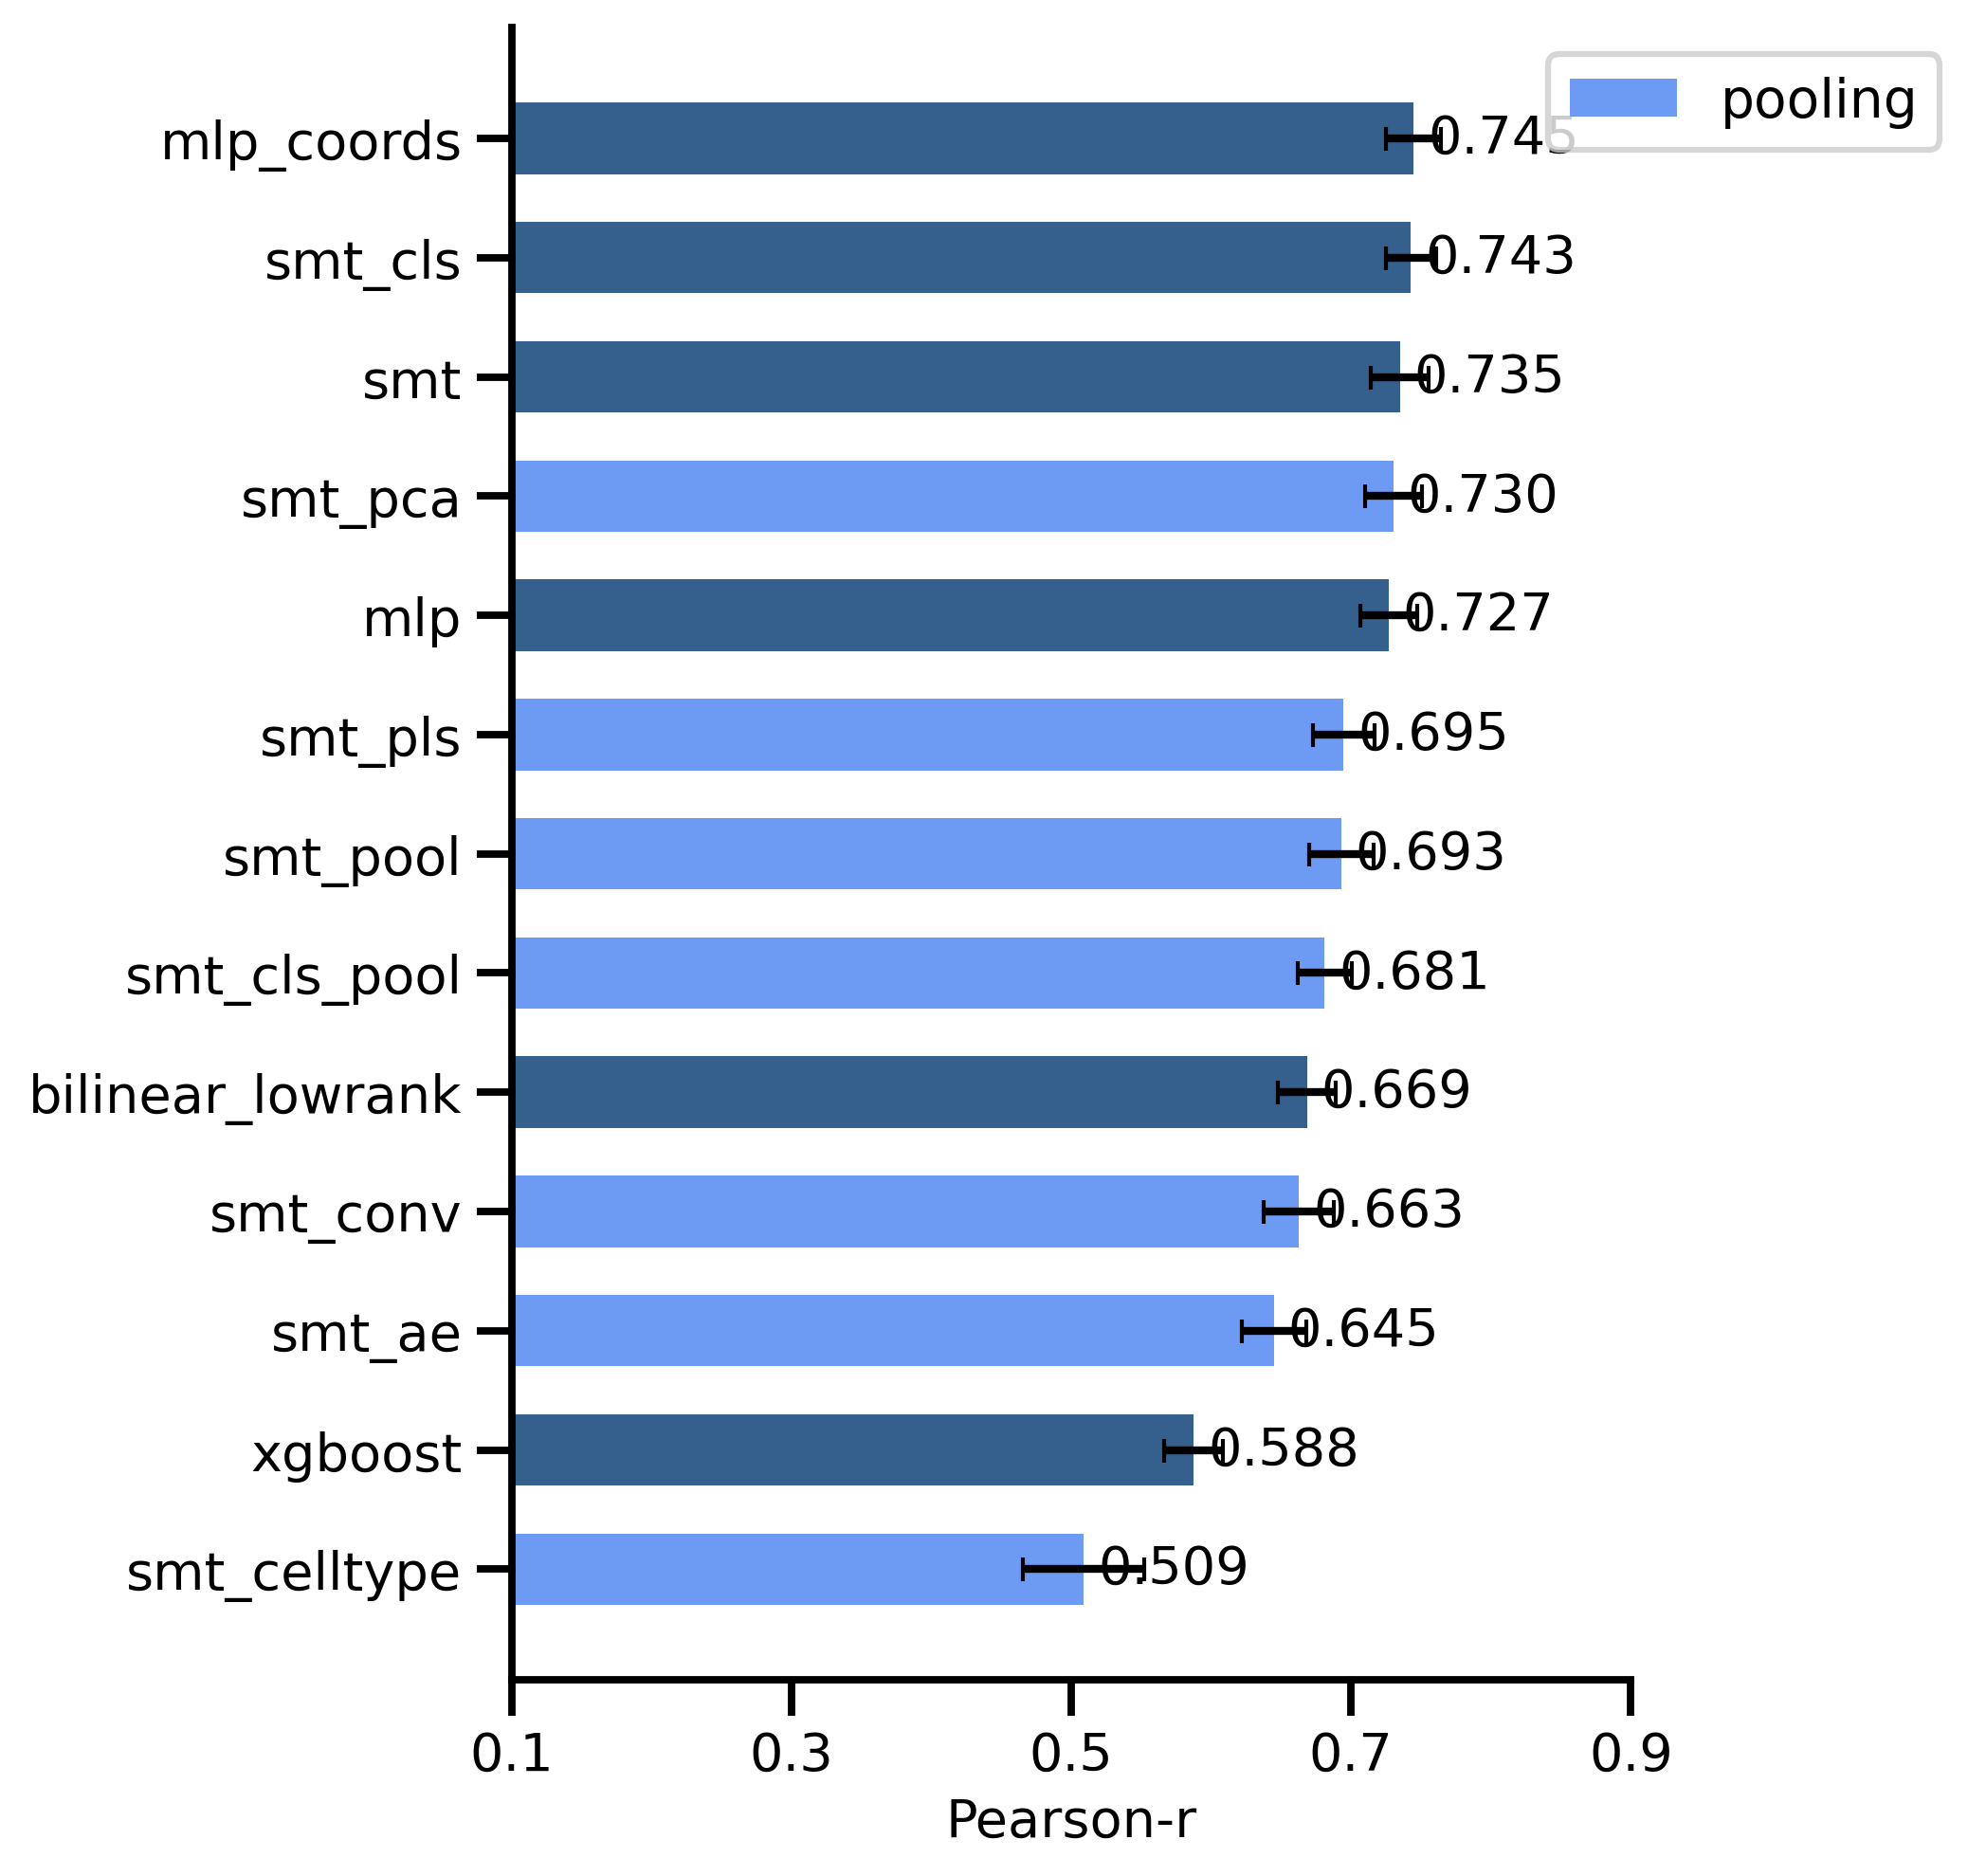

In [10]:
highlight_models = ['shared_transformer_pool', 'shared_transformer_cls_pool',
          'shared_transformer_pca', 'shared_transformer_pls',  'shared_transformer_ae', 'shared_transformer_conv', 
          'shared_transformer_celltype', 'shared_transformer_geneformer']

plot_model_barchart(summary_dict_spatial, metric="test_pearson_r", xlim=(0.1, 0.9), highlight_models=highlight_models, highlight_label='pooling')

### SMT Pool Encoding Analysis

In [ ]:
def fetch_and_summarize_wandb_runs_smt_pool(model, cv_type, null_model, sort_genes='refgenome', token_encoder_dim=60, feature_type='transcriptome', target='FC', within_last=60, before_last=0, use_weighted=False, exclude='HCP', return_history=False):
    """
    Fetches wandb runs matching specific tags and summarizes their final train/test metrics.
    Handles different CV types with their expected number of runs:
    - random/spatial: 40 runs
    - schaefer: 9 runs  
    - lobe: 6 runs
    
    Args:
        model (str): Model name, e.g., 'bilinear_CM'
        cv_type (str): CV type, one of: 'random', 'spatial', 'schaefer', 'lobe'
        null_model (str): Null model label, e.g., 'none'
        feature_type (str): Feature type, e.g., 'transcriptome_PCA'
        target (str): Target connectome type, e.g., 'FC'
        within_last (int): Search for runs within this many days ago (default: 60)
        before_last (int): Exclude runs from this many days ago (default: 0)
        use_weighted (bool): Whether to compute weighted statistics for schaefer/lobe CV
        exclude (str): Dataset to exclude from search (default: 'HCP')
        return_history (bool): If True, return (summary_df, history_df) tuple
    
    Returns:
        summary_df (pd.DataFrame): DataFrame with mean, std, stderr of all train/test metrics
                                  If use_weighted=True and cv_type in ['schaefer', 'lobe'], 
                                  includes weighted_mean and weighted_stderr rows
        history_df (pd.DataFrame): Individual run data (only returned if return_history=True)
    """
    # Set time filters
    end_time = datetime.now() - timedelta(days=before_last)
    start_time = datetime.now() - timedelta(days=within_last)
    
    # Set expected number of runs based on cv_type
    if cv_type == "schaefer":
        expected_runs = 9
    elif cv_type == "lobe":
        expected_runs = 6
    else:  # random or spatial
        expected_runs = 40
    filters = {
        "tags": {
            "$all": [
                "final_eval",
                f"model_{model}",
                f"target_{target}",
                f"cv_type_{cv_type}",
                f"null_model_{null_model}",
                f"feature_type_{feature_type}", 
                f"sort_genes_{sort_genes}"
            ],
        },
        "config.token_encoder_dim": token_encoder_dim,
        "created_at": {
            "$gte": start_time.isoformat(), 
            "$lte": end_time.isoformat()
        },
        "state": "finished"
    }
    
    # Add exclusion filter if specified
    if exclude != "":
        filters["tags"]["$nin"] = [f"dataset_{exclude}"]
    
    print(f"🔍 Fetching runs for: model={model}, cv_type={cv_type}, null_model={null_model}, feature_type={feature_type}")
    runs = api.runs(project_path, filters=filters, order="-created_at")
    
    run_data = []
    for run in runs:
        metrics = {}
        summary = run.summary

        # Attempt to extract the pearson_r value (or set to NaN if missing)
        pearson = summary.get("final_test_metrics", {}).get("pearson_r", np.nan)

        # Only consider runs with meaningful final_test_metrics
        if "final_test_metrics" not in summary:
            continue
        
        for k, v in summary.get('final_train_metrics', {}).items():
            if isinstance(v, (int, float)):
                metrics[f'train_{k}'] = v

        for k, v in summary.get('final_test_metrics', {}).items():
            if isinstance(v, (int, float)):
                metrics[f'test_{k}'] = v

        metrics['run_name'] = run.name
        metrics['run_id'] = run.id
        metrics['final_test_pearson_r'] = pearson
        
        # Extract fold number for weighted calculations
        if use_weighted and cv_type in ['schaefer', 'lobe']:
            fold_match = re.search(r'fold(\d+)', run.name)
            if fold_match:
                metrics['fold'] = int(fold_match.group(1))
        
        run_data.append(metrics)
    
    df = pd.DataFrame(run_data)

    print(f"📊 Found {len(df)} total runs")

    if len(df) < expected_runs:
        raise ValueError(f"❌ Expected {expected_runs} runs, but found {len(df)}.")

    # Handle deduplication based on CV type
    if use_weighted and cv_type in ['schaefer', 'lobe']:
        # Sort by fold number for proper weight assignment
        df = df.sort_values('fold')
        # Deduplicate by fold keeping highest test pearson_r within each fold
        df_unique = (
            df.sort_values(["fold", "final_test_pearson_r"], ascending=[True, False])
              .drop_duplicates("fold", keep="first")
        )
        print(f"📊 After deduplication: {len(df_unique)} unique runs")
        if len(df_unique) != expected_runs:
            raise ValueError(f"❌ Expected {expected_runs} unique folds, found {len(df_unique)} after deduplication.")
    else:
        # Deduplicate by run_name using highest test pearson_r
        df_unique = (
            df.sort_values("final_test_pearson_r", ascending=False)
              .drop_duplicates("run_name", keep="first")
        )
        print(f"📊 After deduplication: {len(df_unique)} unique runs")
        if len(df_unique) != expected_runs:
            raise ValueError(f"❌ Expected {expected_runs} unique run names, found {len(df_unique)} after deduplication.")

    # Store history before cleaning for aggregation
    history_df = df_unique.copy()
    
    # Clean and summarize
    columns_to_drop = ["run_name", "run_id", "final_test_pearson_r"]
    if 'fold' in df_unique.columns:
        columns_to_drop.append("fold")
    df_clean = df_unique.drop(columns=columns_to_drop, errors="ignore")

    summary_df = pd.DataFrame({
        "mean": df_clean.mean(),
        "std": df_clean.std(),
        "stderr": df_clean.sem()
    }).T
    
    # Add weighted statistics if requested and applicable
    if use_weighted and cv_type in ['schaefer', 'lobe']:
        weights = list(CV_WEIGHTS[cv_type].values())
        
        # Calculate weighted statistics for final_test_pearson_r
        weighted_mean, weighted_se = weighted_mean_and_se(df_unique['final_test_pearson_r'].values, weights)
        summary_df.loc['weighted_mean', 'final_test_pearson_r'] = weighted_mean
        summary_df.loc['weighted_stderr', 'final_test_pearson_r'] = weighted_se
        
        # Calculate weighted statistics for test_pearson_r if it exists
        if 'test_pearson_r' in df_clean.columns:
            test_pearson_values = df_unique['test_pearson_r'].values if 'test_pearson_r' in df_unique.columns else df_clean['test_pearson_r'].values
            weighted_mean_test, weighted_se_test = weighted_mean_and_se(test_pearson_values, weights)
            summary_df.loc['weighted_mean', 'test_pearson_r'] = weighted_mean_test
            summary_df.loc['weighted_stderr', 'test_pearson_r'] = weighted_se_test

    if return_history:
        return summary_df, history_df
    else:
        return summary_df


Random

In [36]:
# Check SMT pool w/ 123 TSS tokens sorted by ref_genome, expression, random
cv_type = 'random'
null_model = 'none'
within_last = 10
token_encoder_dim = 60
before_last = 0
model_type = 'shared_transformer_pool'

smt_pool_ref_df = fetch_and_summarize_wandb_runs_smt_pool(model_type, cv_type, null_model, sort_genes='refgenome', token_encoder_dim=token_encoder_dim, feature_type='transcriptome', target='FC', within_last=within_last, before_last=before_last)
smt_pool_exp_df = fetch_and_summarize_wandb_runs_smt_pool(model_type, cv_type, null_model, sort_genes='expression', token_encoder_dim=token_encoder_dim, feature_type='transcriptome', target='FC', within_last=within_last, before_last=before_last)
smt_pool_rand_df = fetch_and_summarize_wandb_runs_smt_pool(model_type, cv_type, null_model, sort_genes='random', token_encoder_dim=token_encoder_dim, feature_type='transcriptome', target='FC', within_last=within_last, before_last=before_last)

🔍 Fetching runs for: model=shared_transformer_pool, cv_type=random, null_model=none, feature_type=transcriptome
📊 Found 56 total runs
📊 After deduplication: 40 unique runs
🔍 Fetching runs for: model=shared_transformer_pool, cv_type=random, null_model=none, feature_type=transcriptome
📊 Found 58 total runs
📊 After deduplication: 40 unique runs
🔍 Fetching runs for: model=shared_transformer_pool, cv_type=random, null_model=none, feature_type=transcriptome
📊 Found 40 total runs
📊 After deduplication: 40 unique runs


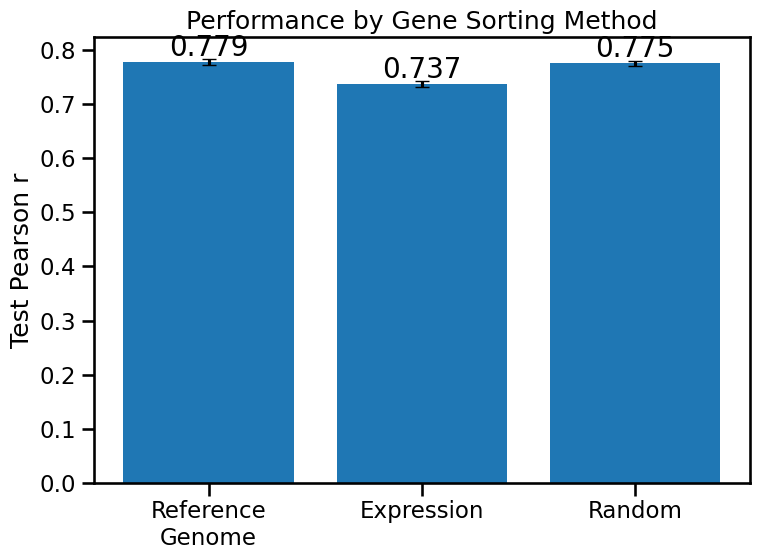

In [38]:
# Create bar plot comparing test_pearson_r across gene sorting methods
plt.figure(figsize=(8, 6))

# Extract means and standard errors
means = [
    smt_pool_ref_df.loc['mean', 'test_pearson_r'],
    smt_pool_exp_df.loc['mean', 'test_pearson_r'], 
    smt_pool_rand_df.loc['mean', 'test_pearson_r']
]
stderrs = [
    smt_pool_ref_df.loc['stderr', 'test_pearson_r'],
    smt_pool_exp_df.loc['stderr', 'test_pearson_r'],
    smt_pool_rand_df.loc['stderr', 'test_pearson_r']
]

# Create bar plot
x = np.arange(3)
bars = plt.bar(x, means, yerr=stderrs, capsize=5)

# Add value labels on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{means[i]:.3f}',
             ha='center', va='bottom')

# Customize plot
plt.xticks(x, ['Reference\nGenome', 'Expression', 'Random'])
plt.ylabel('Test Pearson r')
plt.title('Performance by Gene Sorting Method')

# Show plot
plt.tight_layout()
plt.show()

In [39]:
# Check SMT pool w/ 123 TSS tokens sorted by ref_genome, expression, random
cv_type = 'spatial'
null_model = 'none'
within_last = 10
token_encoder_dim = 60
before_last = 0
model_type = 'shared_transformer_pool'

smt_pool_ref_df = fetch_and_summarize_wandb_runs_smt_pool(model_type, cv_type, null_model, sort_genes='refgenome', token_encoder_dim=token_encoder_dim, feature_type='transcriptome', target='FC', within_last=within_last, before_last=before_last)
smt_pool_exp_df = fetch_and_summarize_wandb_runs_smt_pool(model_type, cv_type, null_model, sort_genes='expression', token_encoder_dim=token_encoder_dim, feature_type='transcriptome', target='FC', within_last=within_last, before_last=before_last)
smt_pool_rand_df = fetch_and_summarize_wandb_runs_smt_pool(model_type, cv_type, null_model, sort_genes='random', token_encoder_dim=token_encoder_dim, feature_type='transcriptome', target='FC', within_last=within_last, before_last=before_last)

🔍 Fetching runs for: model=shared_transformer_pool, cv_type=spatial, null_model=none, feature_type=transcriptome
📊 Found 56 total runs
📊 After deduplication: 40 unique runs
🔍 Fetching runs for: model=shared_transformer_pool, cv_type=spatial, null_model=none, feature_type=transcriptome
📊 Found 55 total runs
📊 After deduplication: 40 unique runs
🔍 Fetching runs for: model=shared_transformer_pool, cv_type=spatial, null_model=none, feature_type=transcriptome
📊 Found 40 total runs
📊 After deduplication: 40 unique runs


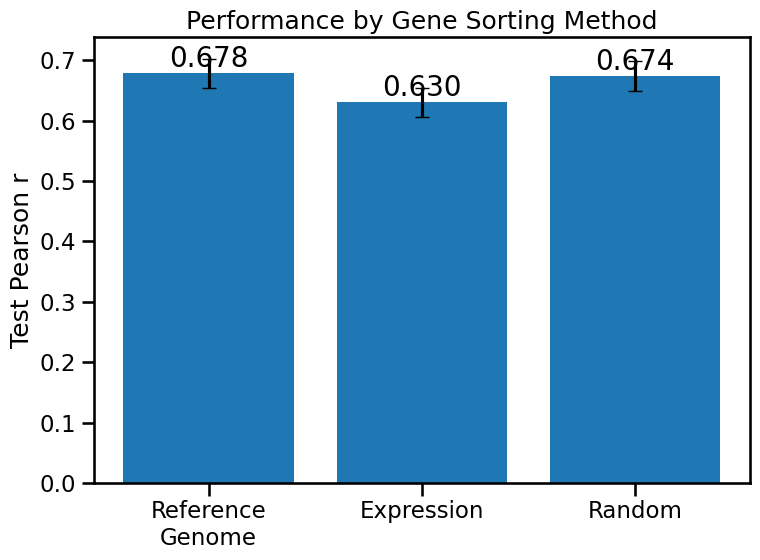

In [40]:
# Create bar plot comparing test_pearson_r across gene sorting methods
plt.figure(figsize=(8, 6))

# Extract means and standard errors
means = [
    smt_pool_ref_df.loc['mean', 'test_pearson_r'],
    smt_pool_exp_df.loc['mean', 'test_pearson_r'], 
    smt_pool_rand_df.loc['mean', 'test_pearson_r']
]
stderrs = [
    smt_pool_ref_df.loc['stderr', 'test_pearson_r'],
    smt_pool_exp_df.loc['stderr', 'test_pearson_r'],
    smt_pool_rand_df.loc['stderr', 'test_pearson_r']
]

# Create bar plot
x = np.arange(3)
bars = plt.bar(x, means, yerr=stderrs, capsize=5)

# Add value labels on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{means[i]:.3f}',
             ha='center', va='bottom')

# Customize plot
plt.xticks(x, ['Reference\nGenome', 'Expression', 'Random'])
plt.ylabel('Test Pearson r')
plt.title('Performance by Gene Sorting Method')

# Show plot
plt.tight_layout()
plt.show()

In [50]:
def fetch_and_summarize_wandb_runs_smt_encoded(model, cv_type, null_model, n_components=None, num_tokens=None, feature_type='transcriptome', target='FC', within_last=60, before_last=0, use_weighted=False, exclude='HCP', return_history=False):
    """
    Fetches wandb runs matching specific tags and summarizes their final train/test metrics.
    Handles different CV types with their expected number of runs:
    - random/spatial: 40 runs
    - schaefer: 9 runs  
    - lobe: 6 runs
    
    Args:
        model (str): Model name, e.g., 'bilinear_CM'
        cv_type (str): CV type, one of: 'random', 'spatial', 'schaefer', 'lobe'
        null_model (str): Null model label, e.g., 'none'
        feature_type (str): Feature type, e.g., 'transcriptome_PCA'
        target (str): Target connectome type, e.g., 'FC'
        within_last (int): Search for runs within this many days ago (default: 60)
        before_last (int): Exclude runs from this many days ago (default: 0)
        use_weighted (bool): Whether to compute weighted statistics for schaefer/lobe CV
        exclude (str): Dataset to exclude from search (default: 'HCP')
        return_history (bool): If True, return (summary_df, history_df) tuple
        num_components (int): Number of components for PCA/PLS models
        num_tokens (int): Number of tokens for conv models
    
    Returns:
        summary_df (pd.DataFrame): DataFrame with mean, std, stderr of all train/test metrics
                                  If use_weighted=True and cv_type in ['schaefer', 'lobe'], 
                                  includes weighted_mean and weighted_stderr rows
        history_df (pd.DataFrame): Individual run data (only returned if return_history=True)
    """
    # Set time filters
    end_time = datetime.now() - timedelta(days=before_last)
    start_time = datetime.now() - timedelta(days=within_last)
    
    # Set expected number of runs based on cv_type
    if cv_type == "schaefer":
        expected_runs = 9
    elif cv_type == "lobe":
        expected_runs = 6
    else:  # random or spatial
        expected_runs = 40
    if 'conv' not in model:
        filters = {
            "tags": {
                "$all": [
                "final_eval",
                f"model_{model}",
                f"target_{target}",
                f"cv_type_{cv_type}",
                f"null_model_{null_model}",
                f"feature_type_{feature_type}"
                ]
            },
            "created_at": {
                "$gte": start_time.isoformat(), 
                "$lte": end_time.isoformat()
            },
            "config.n_components": n_components,
            "state": "finished"
        }
    else: 
        filters = {
            "tags": {
                "$all": [
                "final_eval",
                f"model_{model}",
                f"target_{target}",
                f"cv_type_{cv_type}",
                f"null_model_{null_model}",
                f"feature_type_{feature_type}"
                ]
            },
            "created_at": {
                "$gte": start_time.isoformat(), 
                "$lte": end_time.isoformat()
            },
            "config.num_tokens": num_tokens,
            "state": "finished"
        }

    # Add model-specific filters
    if 'pca' in model or 'pls' in model:
        if n_components is None:
            raise ValueError("n_components must be specified for PCA/PLS models")
        filters["config.n_components"] = n_components
    elif 'conv' in model:
        if num_tokens is None:
            raise ValueError("num_tokens must be specified for conv models")
        filters["config.num_tokens"] = num_tokens
    else:
        filters["config.token_encoder_dim"] = token_encoder_dim
    
    # Add exclusion filter if specified
    if exclude != "":
        filters["tags"]["$nin"] = [f"dataset_{exclude}"]
    
    print(f"🔍 Fetching runs for: model={model}, cv_type={cv_type}, null_model={null_model}, feature_type={feature_type}")
    runs = api.runs(project_path, filters=filters, order="-created_at")
    
    run_data = []
    for run in runs:
        metrics = {}
        summary = run.summary

        # Attempt to extract the pearson_r value (or set to NaN if missing)
        pearson = summary.get("final_test_metrics", {}).get("pearson_r", np.nan)

        # Only consider runs with meaningful final_test_metrics
        if "final_test_metrics" not in summary:
            continue
        
        for k, v in summary.get('final_train_metrics', {}).items():
            if isinstance(v, (int, float)):
                metrics[f'train_{k}'] = v

        for k, v in summary.get('final_test_metrics', {}).items():
            if isinstance(v, (int, float)):
                metrics[f'test_{k}'] = v

        metrics['run_name'] = run.name
        metrics['run_id'] = run.id
        metrics['final_test_pearson_r'] = pearson
        
        # Extract fold number for weighted calculations
        if use_weighted and cv_type in ['schaefer', 'lobe']:
            fold_match = re.search(r'fold(\d+)', run.name)
            if fold_match:
                metrics['fold'] = int(fold_match.group(1))
        
        run_data.append(metrics)
    
    df = pd.DataFrame(run_data)

    print(f"📊 Found {len(df)} total runs")

    if len(df) < expected_runs:
        raise ValueError(f"❌ Expected {expected_runs} runs, but found {len(df)}.")

    # Handle deduplication based on CV type
    if use_weighted and cv_type in ['schaefer', 'lobe']:
        # Sort by fold number for proper weight assignment
        df = df.sort_values('fold')
        # Deduplicate by fold keeping highest test pearson_r within each fold
        df_unique = (
            df.sort_values(["fold", "final_test_pearson_r"], ascending=[True, False])
              .drop_duplicates("fold", keep="first")
        )
        print(f"📊 After deduplication: {len(df_unique)} unique runs")
        if len(df_unique) != expected_runs:
            raise ValueError(f"❌ Expected {expected_runs} unique folds, found {len(df_unique)} after deduplication.")
    else:
        # Deduplicate by run_name using highest test pearson_r
        df_unique = (
            df.sort_values("final_test_pearson_r", ascending=False)
              .drop_duplicates("run_name", keep="first")
        )
        print(f"📊 After deduplication: {len(df_unique)} unique runs")
        if len(df_unique) != expected_runs:
            raise ValueError(f"❌ Expected {expected_runs} unique run names, found {len(df_unique)} after deduplication.")

    # Store history before cleaning for aggregation
    history_df = df_unique.copy()
    
    # Clean and summarize
    columns_to_drop = ["run_name", "run_id", "final_test_pearson_r"]
    if 'fold' in df_unique.columns:
        columns_to_drop.append("fold")
    df_clean = df_unique.drop(columns=columns_to_drop, errors="ignore")

    summary_df = pd.DataFrame({
        "mean": df_clean.mean(),
        "std": df_clean.std(),
        "stderr": df_clean.sem()
    }).T
    
    # Add weighted statistics if requested and applicable
    if use_weighted and cv_type in ['schaefer', 'lobe']:
        weights = list(CV_WEIGHTS[cv_type].values())
        
        # Calculate weighted statistics for final_test_pearson_r
        weighted_mean, weighted_se = weighted_mean_and_se(df_unique['final_test_pearson_r'].values, weights)
        summary_df.loc['weighted_mean', 'final_test_pearson_r'] = weighted_mean
        summary_df.loc['weighted_stderr', 'final_test_pearson_r'] = weighted_se
        
        # Calculate weighted statistics for test_pearson_r if it exists
        if 'test_pearson_r' in df_clean.columns:
            test_pearson_values = df_unique['test_pearson_r'].values if 'test_pearson_r' in df_unique.columns else df_clean['test_pearson_r'].values
            weighted_mean_test, weighted_se_test = weighted_mean_and_se(test_pearson_values, weights)
            summary_df.loc['weighted_mean', 'test_pearson_r'] = weighted_mean_test
            summary_df.loc['weighted_stderr', 'test_pearson_r'] = weighted_se_test

    if return_history:
        return summary_df, history_df
    else:
        return summary_df


In [ ]:
# Check SMT pool w/ 123 TSS tokens sorted by ref_genome, expression, random
cv_type = 'spatial'
null_model = 'none'
within_last = 30
before_last = 0

model_type = 'shared_transformer_pca'
smt_pool_pca_df = fetch_and_summarize_wandb_runs_smt_encoded(model_type, cv_type, null_model, n_components=128, feature_type='transcriptome', target='FC', within_last=within_last, before_last=before_last)
model_type = 'shared_transformer_pls'
smt_pool_pls_df = fetch_and_summarize_wandb_runs_smt_encoded(model_type, cv_type, null_model, n_components=128, feature_type='transcriptome', target='FC', within_last=within_last, before_last=before_last)
model_type = 'shared_transformer_ae'
smt_pool_ae_df = fetch_and_summarize_wandb_runs_smt_encoded(model_type, cv_type, null_model, n_components=128, feature_type='transcriptome', target='FC', within_last=within_last, before_last=before_last)
model_type = 'shared_transformer_conv'
smt_pool_conv_df = fetch_and_summarize_wandb_runs_smt_encoded(model_type, cv_type, null_model, num_tokens=128, feature_type='transcriptome', target='FC', within_last=within_last, before_last=before_last)

🔍 Fetching runs for: model=shared_transformer_pca, cv_type=spatial, null_model=none, feature_type=transcriptome
📊 Found 143 total runs
📊 After deduplication: 40 unique runs
🔍 Fetching runs for: model=shared_transformer_pls, cv_type=spatial, null_model=none, feature_type=transcriptome
📊 Found 41 total runs
📊 After deduplication: 40 unique runs
🔍 Fetching runs for: model=shared_transformer_conv, cv_type=spatial, null_model=none, feature_type=transcriptome
📊 Found 22 total runs


ValueError: ❌ Expected 40 runs, but found 22.